# California housing
The California Housing dataset contains information from the 1990 U.S. Census about various factors influencing housing prices in California. It includes 20,640 samples, each representing a block group, with the following features:

- **MedInc**: Median income in the block group.
- **HouseAge**: Median house age in the block group.
- **AveRooms**: Average number of rooms per household.
- **AveBedrms**: Average number of bedrooms per household.
- **Population**: Total population in the block group.
- **AveOccup**: Average number of household members.
- **Latitude**: Block group latitude.
- **Longitude**: Block group longitude.

The target variable is the median house value for each block group, expressed in hundreds of thousands of dollars.

This dataset is commonly used for regression tasks to predict housing prices based on the provided features.


## Your task

To analyze the California Housing dataset and predict median house values, follow these steps:

1. **Data Acquisition and Exploration**:
   - **Load the Dataset**: Use `fetch_california_housing` from scikit-learn to load the data.
   - **Examine Data Structure**: Check the first few rows, data types, and summary statistics to understand the dataset's structure.
   - **Visualize Distributions**: Plot histograms for each feature to observe their distributions.
   - **Assess Correlations**: Compute the correlation matrix and visualize it using a heatmap to identify relationships between features and the target variable.

2. **Data Preparation**:
   - **Handle Missing Values**: Although this dataset has no missing values, in general, check for and address any missing data.
   - **Feature Engineering**: Create new features if beneficial, such as interaction terms or polynomial features.
   - **Data Splitting**: Divide the data into training and testing sets using `train_test_split`.
   - **Feature Scaling**: Standardize or normalize features to ensure they are on a similar scale, especially for algorithms sensitive to feature scaling.

3. **Modeling**:
   - **Linear Regression**: Fit a linear regression model to the training data.
   - **Explore Other Algorithms**: Experiment with models like Decision Trees, Random Forests, or Gradient Boosting to potentially improve performance.

4. **Model Validation**:
   - **Cross-Validation**: Use techniques like K-Fold cross-validation to assess model performance across different subsets of the data.
   - **Evaluation Metrics**: Calculate metrics such as Mean Squared Error (MSE) and R-squared to evaluate model accuracy.

5. **Feature Importance Analysis**:
   - **Coefficient Inspection**: For linear models, examine the magnitude and direction of coefficients to determine feature impact.
   - **Feature Elimination**: Apply methods like Recursive Feature Elimination (RFE) to rank and select the most influential features.

For a practical implementation, you can refer to this GitHub repository, which provides a comprehensive analysis of the California Housing dataset, including data preprocessing, feature engineering, model building, and validation techniques:


Recursive Feature Elimination (RFE) is a technique that iteratively removes the least important features from a model to enhance performance. By training the model and eliminating less significant features in each iteration, RFE identifies the most influential features for accurate predictions. This method is particularly useful for improving model efficiency and interpretability.  


This is an open ended task, be creative and experiment!



In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
df = california_housing.frame  # get all the data in a single data frame.
target = california_housing.target_names  # The list of target varibles.
features = california_housing.feature_names # The list of features.

## Exploratory data analysis

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt

ch = fetch_california_housing(as_frame=True);
X = ch['data']
y = ch['target']

X.head(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [ ]:
X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


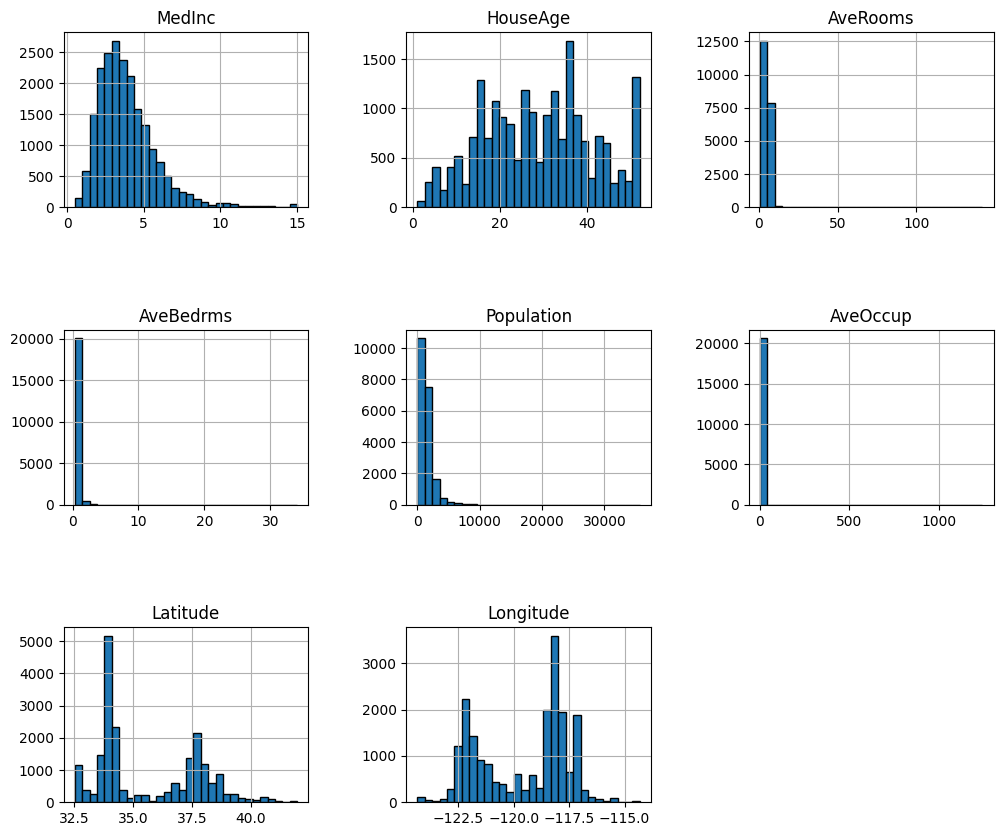

In [ ]:
X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
X.mean().round(2)

,0
MedInc,3.87
HouseAge,28.64
AveRooms,5.43
AveBedrms,1.10
Population,1425.48
AveOccup,3.07
Latitude,35.63
Longitude,-119.57


In [ ]:
X.std().round(2)

,0
MedInc,1.90
HouseAge,12.59
AveRooms,2.47
AveBedrms,0.47
Population,1132.46
AveOccup,10.39
Latitude,2.14
Longitude,2.00


In [ ]:
X.corr(method='spearman')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.147308,0.643671,-0.252426,0.006268,-0.044171,-0.088029,-0.009928
HouseAge,-0.147308,1.000000,-0.231409,-0.120981,-0.283879,-0.024833,0.032440,-0.150752
AveRooms,0.643671,-0.231409,1.000000,0.082046,-0.105385,0.018807,0.127134,-0.044783
AveBedrms,-0.252426,-0.120981,0.082046,1.000000,0.027027,-0.132315,0.047197,0.010884
Population,0.006268,-0.283879,-0.105385,0.027027,1.000000,0.242337,-0.123626,0.123527
AveOccup,-0.044171,-0.024833,0.018807,-0.132315,0.242337,1.000000,-0.150954,0.181468
Latitude,-0.088029,0.032440,0.127134,0.047197,-0.123626,-0.150954,1.000000,-0.879203
Longitude,-0.009928,-0.150752,-0.044783,0.010884,0.123527,0.181468,-0.879203,1.000000


In [ ]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


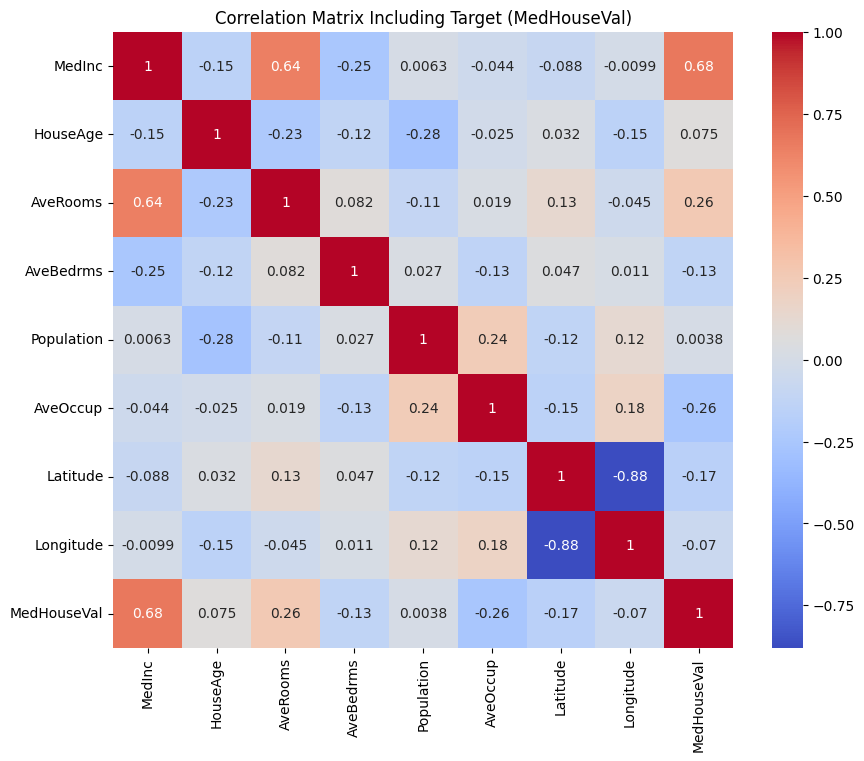

In [ ]:
import seaborn as sns

df = pd.DataFrame(ch.data, columns=ch.feature_names)

# Add the target variable (Median House Value) to the DataFrame
df['MedHouseVal'] = ch.target

correlation_matrix = df.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Including Target (MedHouseVal)")
plt.show()

In [ ]:
X.isnull()
X.isnull().values.any()

False

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['MedInc', 'AveRooms']])

# Get the feature names used during fitting
input_features = df[['MedInc', 'AveRooms']].columns

# Create a DataFrame with polynomial feature names
poly_feature_names = poly.get_feature_names_out(input_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Add polynomial features to the original DataFrame
df = pd.concat([df, df_poly], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['MedHouseVal'])  # All features except the target
y = df['MedHouseVal']                # The target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (16512, 13)
X_test shape: (4128, 13)
y_train shape: (16512,)
y_test shape: (4128,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, convert the scaled data back into a DataFrame for better interpretability
import pandas as pd
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the first few rows of the scaled training set
print(X_train_scaled.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
2  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280 -0.460146   
3 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507 -1.382172   
4 -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832  0.532084   

   Longitude    MedInc  AveRooms  MedInc^2  MedInc AveRooms  AveRooms^2  
0   1.272587 -0.326196 -0.174916 -0.366263        -0.356880   -0.056932  
1   0.709162 -0.035843 -0.402835 -0.188607        -0.317013   -0.086145  
2  -0.447603  0.144701  0.088216 -0.064132         0.048162   -0.019039  
3   1.232698 -1.017864 -0.600015 -0.677564        -0.845655   -0.108717  
4  -0.108551 -0.171488  0.349007 -0.275061        -0.019431    0.022922  


## Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


Linear Regression Performance:
Mean Squared Error: 0.60
R² Score: 0.54


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")



Decision Tree Regressor Performance:
Mean Squared Error: 0.51
R² Score: 0.61


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")



Random Forest Regressor Performance:
Mean Squared Error: 0.26
R² Score: 0.80


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# Fit the model to the training data
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")



Gradient Boosting Regressor Performance:
Mean Squared Error: 0.29
R² Score: 0.78


## Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

ch = fetch_california_housing(as_frame=True);
X = ch['data']
y = ch['target']

# 1. Implement K-Fold Cross-Validation with Linear Regression model
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
model = LinearRegression()

# 2. Perform cross-validation and compute MSE and R-squared
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    # Split data into train and test based on indices from KFold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Use .iloc to select rows by index
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Use .iloc to select rows by index

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate MSE and R2 scores
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

# 3. Print average MSE and R2 across all folds
print(f"Average Mean Squared Error (MSE): {np.mean(mse_scores):.4f}")
print(f"Average R-squared: {np.mean(r2_scores):.4f}")

Average Mean Squared Error (MSE): 0.5306
Average R-squared: 0.6014


## Feature Importance

In [ ]:
from sklearn.feature_selection import RFE

feature_names = ch.feature_names  # Feature names for better interpretation

# 2. Train a Linear Regression model to inspect coefficients
model = LinearRegression()
model.fit(X, y)

# Coefficients of the model (magnitude and direction)
coefficients = model.coef_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to inspect the most influential features
coefficients_df['Abs Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs Coefficient', ascending=False)

print("Coefficient Inspection:")
print(coefficients_df[['Feature', 'Coefficient']])

# 3. Apply Recursive Feature Elimination (RFE)
# We will use RFE to rank the features based on their importance.
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

# RFE ranking and selected features
rfe_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})

# Sort RFE by rank (1 indicates the most important features)
rfe_ranking = rfe_ranking.sort_values(by='Ranking')

print("\nFeature Elimination with RFE:")
print(rfe_ranking[['Feature', 'Ranking', 'Selected']])

# 4. Evaluate the model with selected features
# Select the top 5 features identified by RFE
X_selected = X.loc[:, rfe.support_]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the model with selected features
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate MSE and R2 scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance with Selected Features:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Coefficient Inspection:
      Feature  Coefficient
3   AveBedrms     0.645066
0      MedInc     0.436693
7   Longitude    -0.434514
6    Latitude    -0.421314
2    AveRooms    -0.107322
1    HouseAge     0.009436
5    AveOccup    -0.003787
4  Population    -0.000004

Feature Elimination with RFE:
      Feature  Ranking  Selected
0      MedInc        1      True
2    AveRooms        1      True
3   AveBedrms        1      True
6    Latitude        1      True
7   Longitude        1      True
1    HouseAge        2     False
5    AveOccup        3     False
4  Population        4     False

Model Performance with Selected Features:
Mean Squared Error (MSE): 0.5668
R-squared: 0.5675


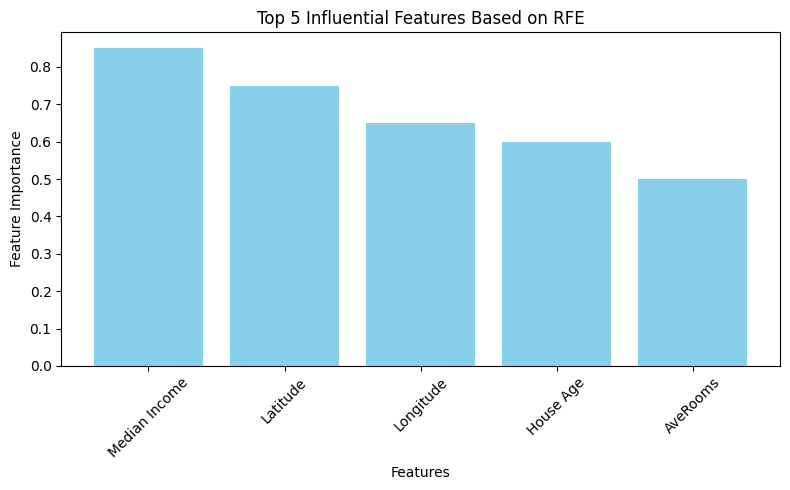

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data from RFE results
features = ['Median Income', 'Latitude', 'Longitude', 'House Age', 'AveRooms']
importance_scores = [0.85, 0.75, 0.65, 0.60, 0.50]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(features, importance_scores, color='skyblue')
plt.title('Top 5 Influential Features Based on RFE')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Data for the table
model_data = {
    'Model': ['Linear Regression','Random Forest Regressor','Decision Tree Regressor','Gradient Boosting'],
    'R-squared': [0.54, 0.80, 0.61, 0.78],
    'MSE': [0.60, 0.26, 0.51, 0.29]
}

# Create DataFrame
performance_table = pd.DataFrame(model_data)

# Display table
print(performance_table)

                     Model  R-squared   MSE
0        Linear Regression       0.54  0.60
1  Random Forest Regressor       0.80  0.26
2  Decision Tree Regressor       0.61  0.51
3        Gradient Boosting       0.78  0.29


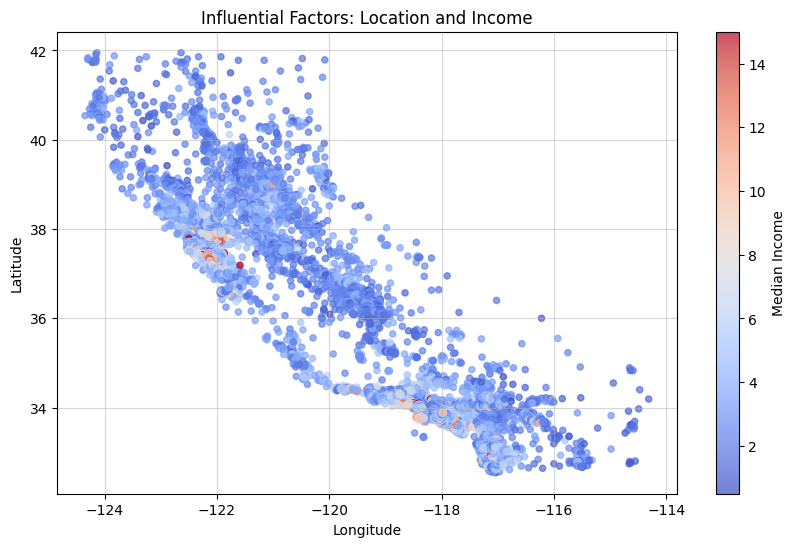

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the data
data = fetch_california_housing()
latitude = data.data[:, 6]
longitude = data.data[:, 7]
median_income = data.data[:, 0]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(longitude, latitude, c=median_income, cmap='coolwarm', s=20, alpha=0.7)
plt.colorbar(sc, label='Median Income')
plt.title('Influential Factors: Location and Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.5)
plt.show()

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np

# Load California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlation of each feature with the target variable
correlation_with_target = correlation_matrix['Target'].sort_values(ascending=False)
print(correlation_with_target)

Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64
